In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
os.chdir(r'C:\Users\acer\Ajupyter_file\QSS_python_tasks\week6')

In [316]:
df=pd.read_csv('loan_prediction.csv')

In [317]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [318]:
df.columns=[i.lower() for i in df.columns]

In [319]:
df.shape

(614, 13)

# EDA

In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    object 
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [321]:
df.describe(include=['int64','float64']).T

,count,mean,std,min,25%,50%,75%,max
applicantincome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
coapplicantincome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
loanamount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
loan_amount_term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
credit_history,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [322]:
df.describe(include=['O']).T

,count,unique,top,freq
loan_id,614,614,LP001002,1
gender,601,2,Male,489
married,611,2,Yes,398
dependents,599,4,0,345
education,614,2,Graduate,480
self_employed,582,2,No,500
property_area,614,3,Semiurban,233
loan_status,614,2,Y,422


## Relationship between categorical features and loan_status

In [323]:
df.drop(['loan_id'],axis=1,inplace=True)
cat_cols= df.drop('loan_status',axis=1).select_dtypes('O').columns.values
cat_cols

array(['gender', 'married', 'dependents', 'education', 'self_employed',
       'property_area'], dtype=object)

In [324]:
def plotter_cat(col):
    sns.countplot(x=col,hue='loan_status',data=df)
    plt.title("{}".format(col))
    plt.show()

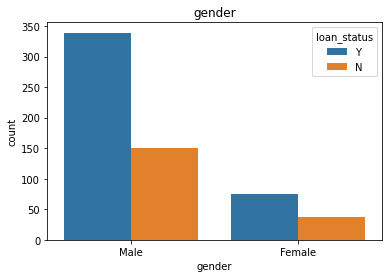

In [325]:
plotter_cat(cat_cols[0])
# let's work on it wheteher to be male/ female affect loan status. we need to calculate ratio of male yes loan to no
# and respectively for female and at the end we'll compare  them

### Gender (X)

In [326]:
def ratio(col):
    gr= df.groupby(by=[col,'loan_status']).apply(np.size)
    uniq= [i for i in df[col].unique() if str(i)!='nan']
    for i in range(len(uniq)):
        try:
            print('Ratio of {0} yes to no:'.format(uniq[i]),gr[uniq[i],'Y']/gr[uniq[i],'N'])
        except:
            print("One of category for loan status is not located for this group")
            print(uniq[i],[])
        print('-'*40)
ratio(cat_cols[0])
# As we see their ratio is approximately same. I suspicious that gender column is not helpfull

Ratio of Male yes to no: 2.26
----------------------------------------
Ratio of Female yes to no: 2.027027027027027
----------------------------------------


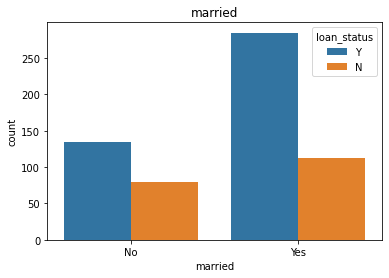

In [327]:
plotter_cat(cat_cols[1])

### Married (✔)

In [328]:
ratio(cat_cols[1])
# These columns are slightly different

Ratio of No yes to no: 1.6962025316455696
----------------------------------------
Ratio of Yes yes to no: 2.52212389380531
----------------------------------------


### Dependents (✔)

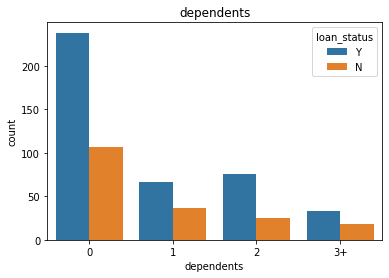

In [329]:
plotter_cat(cat_cols[2])

### Education (✔)

In [330]:
ratio(cat_cols[2])
# There is variety too especially for dependents 2 

Ratio of 0 yes to no: 2.2242990654205608
----------------------------------------
Ratio of 1 yes to no: 1.8333333333333333
----------------------------------------
Ratio of 2 yes to no: 3.04
----------------------------------------
Ratio of 3+ yes to no: 1.8333333333333333
----------------------------------------


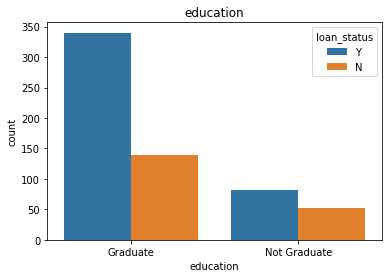

In [331]:
plotter_cat(cat_cols[3])

### Self employed (X)

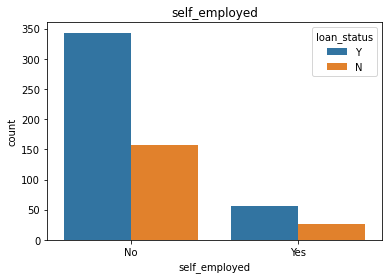

In [332]:
plotter_cat(cat_cols[4])

In [333]:
ratio(cat_cols[4])
# It seems they are approximately same

Ratio of No yes to no: 2.1847133757961785
----------------------------------------
Ratio of Yes yes to no: 2.1538461538461537
----------------------------------------


### Properity_area (✔)

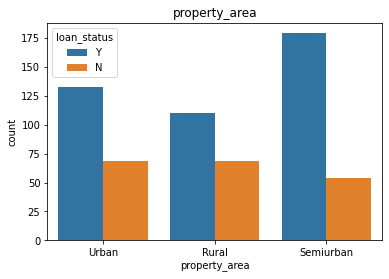

In [334]:
plotter_cat(cat_cols[5])

In [335]:
ratio(cat_cols[5])
# They differ especially Semiurban's variety is bigger

Ratio of Urban yes to no: 1.9275362318840579
----------------------------------------
Ratio of Rural yes to no: 1.5942028985507246
----------------------------------------
Ratio of Semiurban yes to no: 3.314814814814815
----------------------------------------


### 

## Investigatoin on numeric columns

In [336]:
num_cols= df.select_dtypes(include=['int64','float64']).columns.values
num_cols

array(['applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history'], dtype=object)

In [337]:
def plotter_num(col):
    plt.figure(figsize=(10,5))
    sns.histplot(df[df['loan_status']=="Y"][col],bins=60,alpha=.5,color='red',label='Yes')
    sns.histplot(df[df['loan_status']=="N"][col],bins=60,alpha=.5,color='cyan',label="No")
    plt.legend()
    plt.show()

## Applicantincome

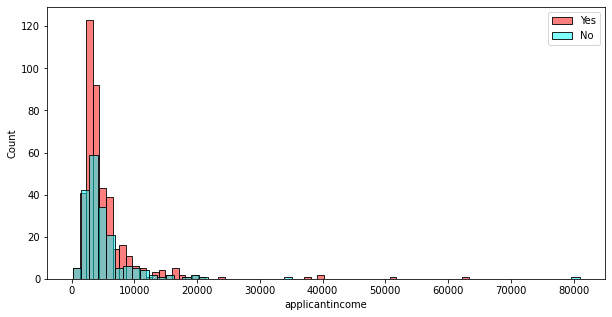

In [338]:
plotter_num(num_cols[0])

## Coapplicantincome

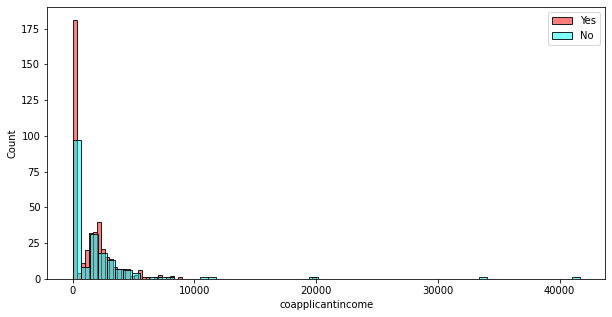

In [339]:
plotter_num(num_cols[1])

## Loanamount

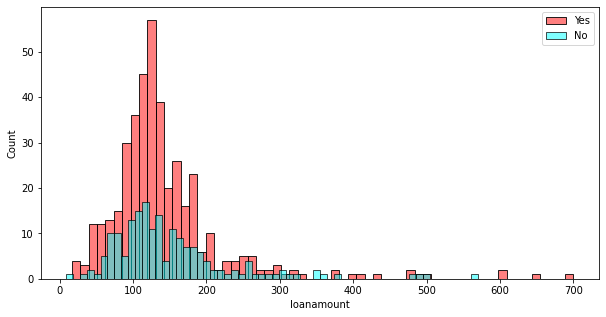

In [340]:
plotter_num(num_cols[2])

## Loan Amount Term

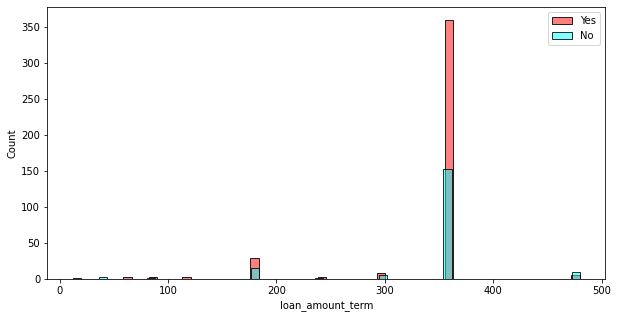

In [341]:
plotter_num(num_cols[3])

In [342]:
df[['loan_amount_term']].describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amount_term,600.0,342.0,65.12041,12.0,360.0,360.0,360.0,480.0


In [343]:
df['loan_amount_term']= df['loan_amount_term']/30

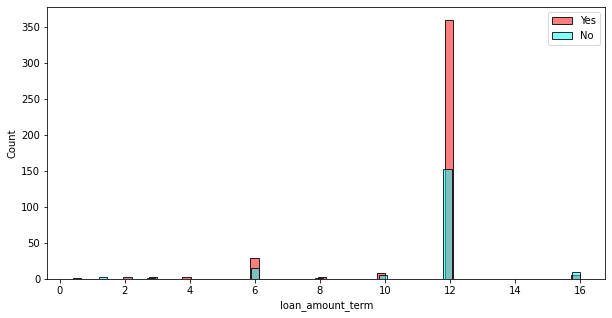

In [344]:
plotter_num(num_cols[3])

Ratio of 12.0 yes to no: 2.34640522875817
Ratio of 8.0 yes to no: 3.0
Ratio of 6.0 yes to no: 1.9333333333333333
Ratio of 10.0 yes to no: 1.6
Ratio of 16.0 yes to no: 0.6666666666666666
Ratio of 2.8 yes to no: 3.0


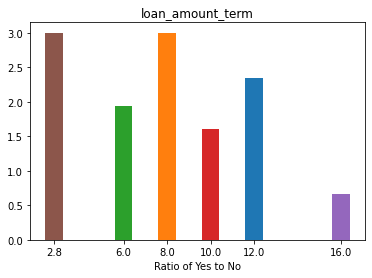

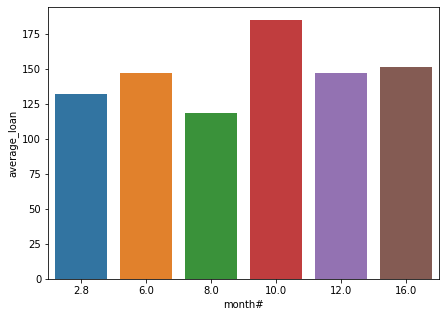

In [345]:
def special_case(col):
    gr= data.groupby(by=[col,'is_authentic']).apply(np.size)
    # amount= data.groupby(by=[col])['loanamount'].apply(np.mean)
    uniq= [i for i in data[col].unique() if str(i)!='nan']
    xtick=[]
    for i in range(len(uniq)):
        try:
            print('Ratio of {0} yes to no:'.format(uniq[i]),gr[uniq[i],1]/gr[uniq[i],0])
            xtick.append(uniq[i])
        except:
            pass
#             print("One of category")
#         print('-'*40)
    plt.xlabel('Ratio of Yes to No')
    plt.title(col)
    plt.xticks(xtick)
    plt.show()
    return sorted([(float("{:.1f}".format(amount[i])),i) for i in xtick],key= lambda x: x[1])
# plotter_cat(num_cols[3])
p=pd.DataFrame(special_case(num_cols[3]),columns=['average_loan','month#'])
plt.figure(figsize= (7,5))
sns.barplot(x=p.iloc[:,1],y=p.iloc[:,0])
plt.show()

In [346]:
# Yuxarida gorduyumuz kimi loan muddetinden asili olmayaraq demek olar ki ayliq odenis ortalama olaraq eynidi
# ancaq baxanda goruruk  ki uzun muddetli loanlarda problem cox lap, az muddetlilerde is lap az olur
# Buna bele baxa bilerik ki uzun muddetli olanda davamli odenisden yorulur ve problem yaranir xususile de sabit geliri yoxdursa 
# ortalar ise sabit gedir

## Credit History

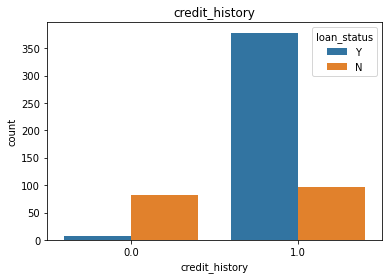

Ratio of 1.0 yes to no: 3.8969072164948453
----------------------------------------
Ratio of 0.0 yes to no: 0.08536585365853659
----------------------------------------


In [347]:
# 3-cu column da categoric gedir
plotter_cat(num_cols[4])
ratio(num_cols[4])
# Below picture shows that there is problems where there is no credit history 

### Applicantincome

In [348]:
from scipy.stats import ttest_ind,ttest_rel,shapiro,levene,mannwhitneyu,wilcoxon

In [350]:
df[num_cols].nunique()

applicantincome      505
coapplicantincome    287
loanamount           203
loan_amount_term      10
credit_history         2
dtype: int64

In [349]:
stat_cols=[]

In [351]:
group= df.groupby(by='loan_status')[num_cols[0]]
yes= group.get_group(name= 'Y')
no= group.get_group(name= 'N')
yes= yes[np.isnan(yes)==False]
no= no[np.isnan(no)==False]

print("shapiro yes: {:.4f}".format(shapiro(yes)[1]))
# Yes is not normally dis.
print("shapiro no: {:.4f}".format(shapiro(no)[1]))
# No is not normally dis.
print("Variance test for these to set: {:.4f}".format(levene(yes,no)[1]))
# So, their variance is not equal

# We'll perform independent nonparametric  test
test,p_val= mannwhitneyu(yes,no)
print(p_val)
stat_cols.append(p_val)
# Our p_value is 0.4590 so we fail to reject it means these two arrays are statistically same

shapiro yes: 0.0000
shapiro no: 0.0000
Variance test for these to set: 0.8389
0.459057140289925


### Coapplicantincome

In [352]:
group= df.groupby(by='loan_status')[num_cols[1]]
yes= group.get_group(name= 'Y')
no= group.get_group(name= 'N')
yes= yes[np.isnan(yes)==False]
no= no[np.isnan(no)==False]

print("shapiro yes: {:.4f}".format(shapiro(yes)[1]))
# Yes is not normally dis.
print("shapiro no: {:.4f}".format(shapiro(no)[1]))
# No is not normally dis.
print("Variance test for these to set: {:.4f}".format(levene(yes,no)[1]))
# So, their variance is not equal

# We'll perform independent nonparametric  test
test,p_val= mannwhitneyu(yes,no)
print(p_val)
stat_cols.append(p_val)
# Our p_value is 0.4590 so we fail to reject it means these two arrays are statistically same

shapiro yes: 0.0000
shapiro no: 0.0000
Variance test for these to set: 0.0275
0.19343675495401091


### Loanamount

In [353]:
group= df.groupby(by='loan_status')[num_cols[2]]
yes= group.get_group(name= 'Y')
no= group.get_group(name= 'N')
yes= yes[np.isnan(yes)==False]
no= no[np.isnan(no)==False]

print("shapiro yes: {:.4f}".format(shapiro(yes)[1]))
# Yes is not normally dis.
print("shapiro no: {:.4f}".format(shapiro(no)[1]))
# No is not normally dis.
print("Variance test for these to set: {:.4f}".format(levene(yes,no)[1]))
# So, their variance is not equal

# We'll perform independent nonparametric  test
test,p_val= mannwhitneyu(yes,no)
print(p_val)
stat_cols.append(p_val)
# Our p_value is 0.3260 so we fail to reject it means these two arrays are statistically same

shapiro yes: 0.0000
shapiro no: 0.0000
Variance test for these to set: 0.3260
0.19760455711728614


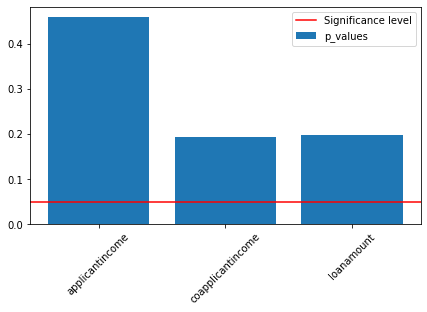

In [188]:
plt.figure(figsize= (7,4))
plt.bar(num_cols[:3],stat_cols,label='p_values')
plt.axhline(0.05,c='r',label='Significance level')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [168]:
df.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,Male,No,0,Graduate,No,5849,0.0,NaN,12.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,12.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,12.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,12.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,12.0,1.0,Urban,Y


-0.11660458122889966

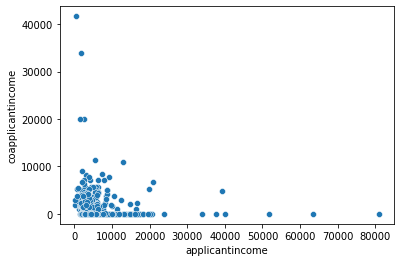

In [175]:
display(df['applicantincome'].corr(df['coapplicantincome']))
sns.scatterplot(x=df['applicantincome'],y=df['coapplicantincome'])
plt.show()

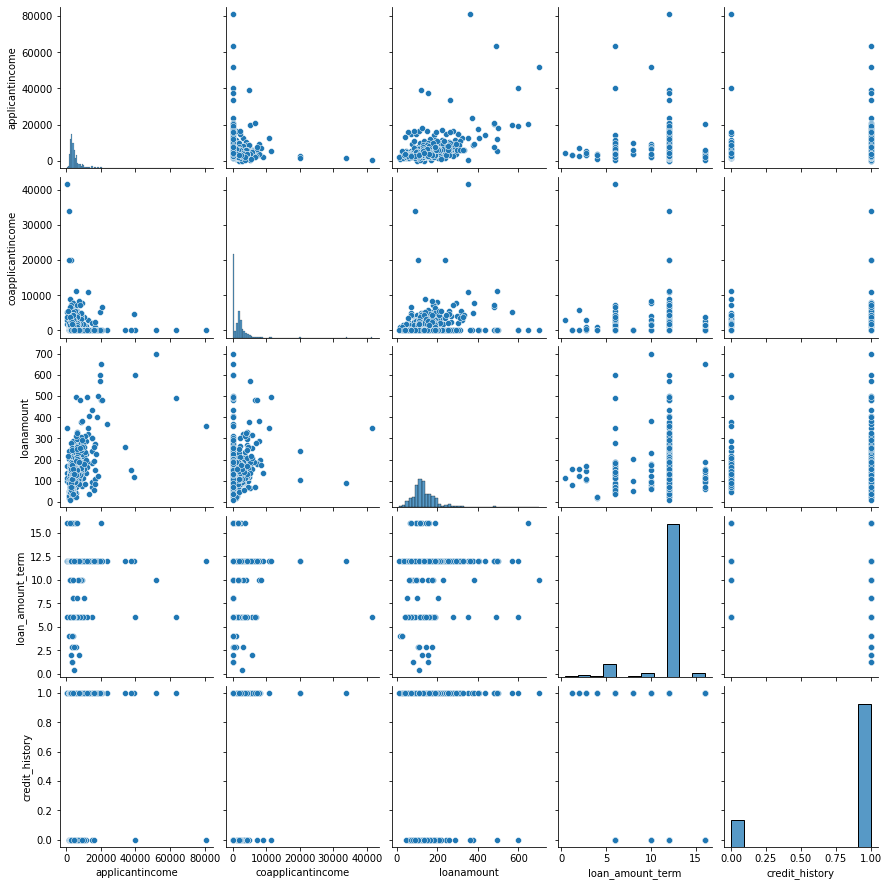

In [190]:
sns.pairplot(df)

# Outlier handling

In [201]:
df.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,Male,No,0,Graduate,No,5849,0.0,NaN,12.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,12.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,12.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,12.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,12.0,1.0,Urban,Y


In [218]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [354]:
# Isolatin forest delete many of data so I'll not use it.
local= LocalOutlierFactor()
tempo= pd.get_dummies(df.dropna())
out= iso.fit_predict(tempo)
df=df.loc[[i for i in df.index if i not in tempo[out==-1].index]]

## Train test

In [392]:
from sklearn.model_selection import train_test_split
x=df.drop('loan_status',axis=1)
y=df['loan_status']

In [410]:
# df_copy= df.copy()

## Null handling

In [397]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

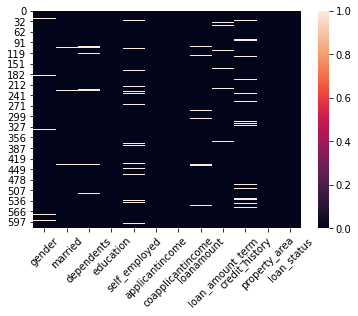

In [398]:
sns.heatmap(df.isnull())
plt.xticks(rotation=45)
plt.show()

In [464]:
df.isnull().sum()

gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64

In [465]:
cols_num= [i for i in df.columns if df[i].nunique()>20]
cols_cat= [i for i in df.columns if i not in cols_num]

In [466]:
col_tr= ColumnTransformer(transformers= [
    ('numeric',SimpleImputer(strategy='mean'),cols_num),
    ('category',SimpleImputer(strategy='most_frequent'),cols_cat)
])

# Let's fill NaN values
df= pd.DataFrame(col_tr.fit_transform(df),columns= list(cols_num)+list(cols_cat))

#### encoding

In [488]:
from sklearn.preprocessing import LabelEncoder
x = pd.get_dummies(df.drop('loan_status',axis=1),columns=[i for i in cols_cat if i!='loan_status'],drop_first=True)
y=df['loan_status']
lbe=LabelEncoder()
y=lbe.fit_transform(y)

## Train test splitting

In [490]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y)

## Model

In [632]:
class model_eva:
    def __init__(self):
        self.mt= __import__('sklearn').metrics
        self.sk= __import__('sklearn')
        self.models= {
            "random_forest":self.sk.ensemble.RandomForestClassifier(),
            "logistic_reg":self.sk.linear_model.LogisticRegression(),
            "knn":self.sk.neighbors.KNeighborsClassifier()
        }
        self.ready_model= {}
    def evaluate(self,x_train,y_train,x_test,y_test):
        for name,model in self.models.items():
            model.fit(x_train,y_train)
            self.ready_model[name]= model
            pred=model.predict(x_test)
            prec= self.mt.precision_score(y_test,pred)
            recall= self.mt.recall_score(y_test,pred)
            f1= self.mt.f1_score(y_test,pred)
            report= self.mt.classification_report(y_test,pred)
            print("*",name.upper())
            print("""Precision: {:.2f}\nRecall: {:.2f}\nF1: {:.2f}\nReport\n{}
            """.format(prec,recall,f1,report))
            print('-'*60)
     

In [506]:
model= model_eva()
model.evaluate(x_train,y_train,x_test,y_test)

* RANDOM_FOREST
Precision: 0.77
Recall: 0.99
F1: 0.87
Report
              precision    recall  f1-score   support

           0       0.96      0.44      0.60        50
           1       0.77      0.99      0.87        95

    accuracy                           0.80       145
   macro avg       0.86      0.71      0.73       145
weighted avg       0.83      0.80      0.78       145

            
------------------------------------------------------------
* LOGISTIC_REG
Precision: 0.77
Recall: 0.99
F1: 0.87
Report
              precision    recall  f1-score   support

           0       0.96      0.44      0.60        50
           1       0.77      0.99      0.87        95

    accuracy                           0.80       145
   macro avg       0.86      0.71      0.73       145
weighted avg       0.83      0.80      0.78       145

            
------------------------------------------------------------
* KNN
Precision: 0.64
Recall: 0.79
F1: 0.71
Report
              precision   

## Feature Engineering

In [507]:
# As we see we have high recall but lower precision 
# It is because Our model is not prepared well
# Let's fix it

In [511]:
# df_copy_ready=df.copy()

In [515]:
# Drop useless columns
df.drop(['gender','self_employed'],axis=1,inplace=True)

In [520]:
# Here we'll change loan amount term by some value to decrease category
df.loc[df['loan_amount_term']==6,'loan_amount_term']=8.0
df.loc[df['loan_amount_term']==10,'loan_amount_term']=12.0

In [521]:
df.head()

,applicantincome,coapplicantincome,loanamount,married,dependents,education,loan_amount_term,credit_history,property_area,loan_status
0,5849.0,0.0,142.924324,No,0,Graduate,12.0,1.0,Urban,Y
1,4583.0,1508.0,128.0,Yes,1,Graduate,12.0,1.0,Rural,N
2,3000.0,0.0,66.0,Yes,0,Graduate,12.0,1.0,Urban,Y
3,2583.0,2358.0,120.0,Yes,0,Not Graduate,12.0,1.0,Urban,Y
4,6000.0,0.0,141.0,No,0,Graduate,12.0,1.0,Urban,Y


In [600]:
df['ratio']=df['loanamount']/df['applicantincome']

### coapplicantincome

<AxesSubplot:ylabel='Frequency'>

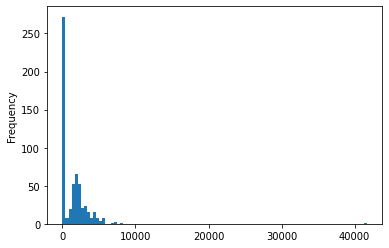

In [538]:
df['coapplicantincome'].plot(kind='hist',bins=100)

In [544]:
coap_zero =(sum(df['coapplicantincome']==0))
print(coap_zero)
print(len(df)-coap_zero)
# I will try to create new column which zero and nonzero values define category

268
309


In [556]:
df['coap_cat']= (df['coapplicantincome']!=0).astype(int)

In [557]:
df.head()

,applicantincome,coapplicantincome,loanamount,married,dependents,education,loan_amount_term,credit_history,property_area,loan_status,coap_cat
0,5849.0,0.0,142.924324,No,0,Graduate,12.0,1.0,Urban,Y,0
1,4583.0,1508.0,128.0,Yes,1,Graduate,12.0,1.0,Rural,N,1
2,3000.0,0.0,66.0,Yes,0,Graduate,12.0,1.0,Urban,Y,0
3,2583.0,2358.0,120.0,Yes,0,Not Graduate,12.0,1.0,Urban,Y,1
4,6000.0,0.0,141.0,No,0,Graduate,12.0,1.0,Urban,Y,0


In [561]:
df.loc[df['dependents']=='3+','dependents']= 3

In [565]:
df['dependents']= df['dependents'].astype('int64')

In [615]:
num_col =['applicantincome', 'coapplicantincome', 'loanamount',
       'dependents', 'loan_amount_term', 'credit_history', 'coap_cat', 'ratio']

df[num_col]=df[num_col].astype('float64')

In [616]:
df.head()

,applicantincome,coapplicantincome,loanamount,married,dependents,education,loan_amount_term,credit_history,property_area,loan_status,coap_cat,ratio
0,5849.0,0.0,142.924324,No,0.0,Graduate,12.0,1.0,Urban,Y,0.0,0.024436
1,4583.0,1508.0,128.000000,Yes,1.0,Graduate,12.0,1.0,Rural,N,1.0,0.027929
2,3000.0,0.0,66.000000,Yes,0.0,Graduate,12.0,1.0,Urban,Y,0.0,0.022000
3,2583.0,2358.0,120.000000,Yes,0.0,Not Graduate,12.0,1.0,Urban,Y,1.0,0.046458
4,6000.0,0.0,141.000000,No,0.0,Graduate,12.0,1.0,Urban,Y,0.0,0.023500


Index(['married', 'education', 'property_area', 'loan_status'], dtype='object')

In [620]:
x = pd.get_dummies(df.drop('loan_status',axis=1),columns=[i for i in df.select_dtypes('object').columns if i!='loan_status'],drop_first=True)
y=df['loan_status']
lbe=LabelEncoder()
y=lbe.fit_transform(y)

In [629]:
x_train,x_test,y_train,y_test= train_test_split(x,y)

In [633]:
model= model_eva()
model.evaluate(x_train,y_train,x_test,y_test)

* RANDOM_FOREST
Precision: 0.83
Recall: 0.95
F1: 0.88
Report
              precision    recall  f1-score   support

           0       0.83      0.55      0.66        44
           1       0.83      0.95      0.88       101

    accuracy                           0.83       145
   macro avg       0.83      0.75      0.77       145
weighted avg       0.83      0.83      0.82       145

            
------------------------------------------------------------
* LOGISTIC_REG
Precision: 0.82
Recall: 0.98
F1: 0.89
Report
              precision    recall  f1-score   support

           0       0.92      0.50      0.65        44
           1       0.82      0.98      0.89       101

    accuracy                           0.83       145
   macro avg       0.87      0.74      0.77       145
weighted avg       0.85      0.83      0.82       145

            
------------------------------------------------------------
* KNN
Precision: 0.68
Recall: 0.83
F1: 0.75
Report
              precision   

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [641]:
# YESSSS it works As we see we get better result by Feature Engineering
# And best Model  is Logistic regression

logistic= model.ready_model['logistic_reg']